In [ ]:
# Installing the package

install.packages("dplyr")

# Loading package
library(dplyr)

# Summary of dataset in package
summary(mtcars)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

In [ ]:

# Installing the package

# For Logistic regression
install.packages("caTools")

# For ROC curve to evaluate model
install.packages("ROCR")

# Loading package
library(caTools)
library(ROCR)

In [ ]:
# Splitting dataset
split <- sample.split(mtcars, SplitRatio = 0.8)
split

train_reg <- subset(mtcars, split == "TRUE")
test_reg <- subset(mtcars, split == "FALSE")

# Training model
logistic_model <- glm(vs ~ wt + disp,
                    data = train_reg,
                    family = "binomial")
logistic_model

# Summary
summary(logistic_model)

[1] FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE


Call:  glm(formula = vs ~ wt + disp, family = "binomial", data = train_reg)

Coefficients:
(Intercept)           wt         disp  
    1.19918      2.58876     -0.04998  

Degrees of Freedom: 23 Total (i.e. Null);  21 Residual
Null Deviance:	    33.1 
Residual Deviance: 13.5 	AIC: 19.5


Call:
glm(formula = vs ~ wt + disp, family = "binomial", data = train_reg)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  1.19918    2.80968   0.427   0.6695  
wt           2.58876    2.04743   1.264   0.2061  
disp        -0.04998    0.02680  -1.865   0.0622 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 33.104  on 23  degrees of freedom
Residual deviance: 13.497  on 21  degrees of freedom
AIC: 19.497

Number of Fisher Scoring iterations: 7


In [ ]:
predict_reg <- predict(logistic_model,
                       test_reg, type = "response")
predict_reg

Mazda RX4     Hornet 4 Drive          Merc 280C         Merc 450SE 
      0.4961355452       0.0331362640       0.8490871904       0.1140800376 
Cadillac Fleetwood   Dodge Challenger        AMC Javelin          Fiat X1-9 
      0.0001504766       0.0037478927       0.0060411798       0.9054944060

   predict_reg
    0 1
  0 5 0
  1 1 2

[1] "Accuracy = 0.875"


[1] 0.8333333

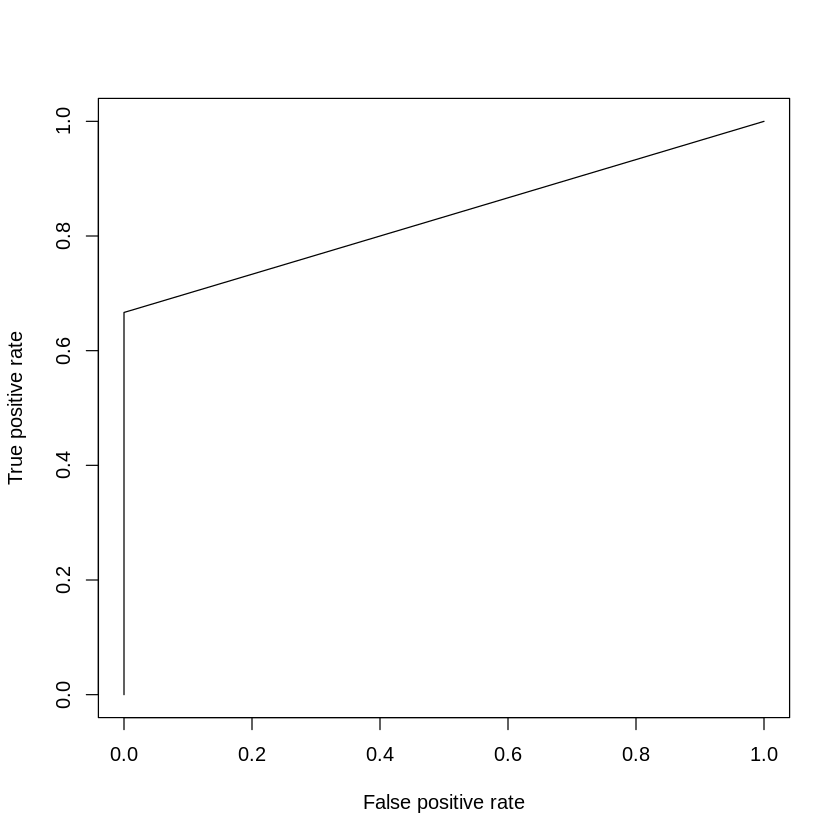

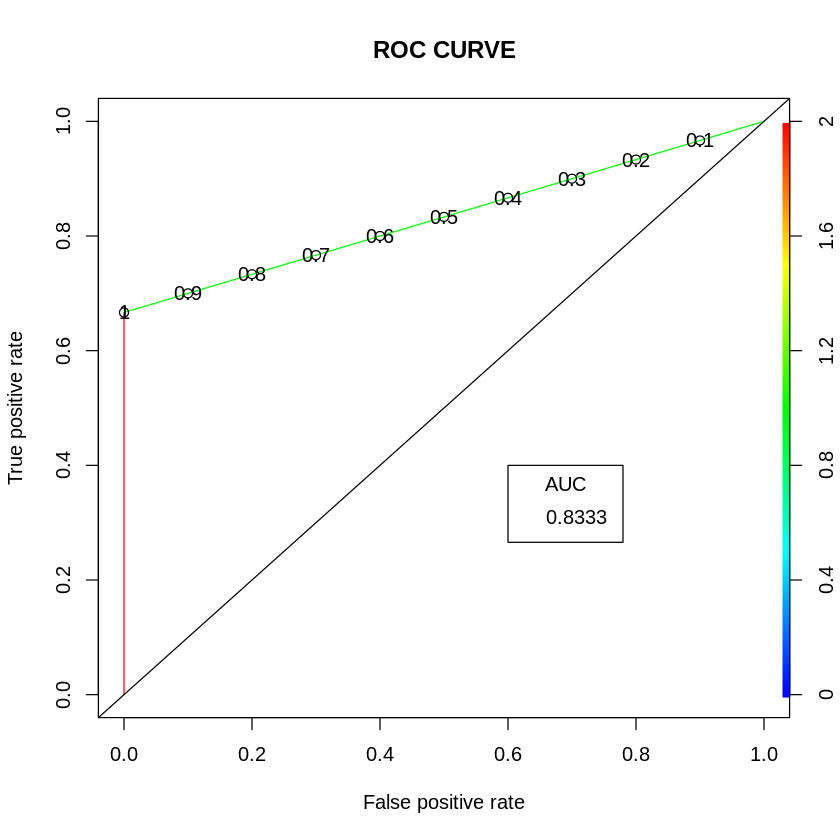

In [ ]:
# Changing probabilities
predict_reg <- ifelse(predict_reg >0.5, 1, 0)

# Evaluating model accuracy
# using confusion matrix
table(test_reg$vs, predict_reg)

missing_classerr <- mean(predict_reg != test_reg$vs)
print(paste('Accuracy =', 1 - missing_classerr))

# ROC-AUC Curve
ROCPred <- prediction(predict_reg, test_reg$vs)
ROCPer <- performance(ROCPred, measure = "tpr",
					x.measure = "fpr")

auc <- performance(ROCPred, measure = "auc")
auc <- auc@y.values[[1]]
auc

# Plotting curve
plot(ROCPer)
plot(ROCPer, colorize = TRUE,
	print.cutoffs.at = seq(0.1, by = 0.1),
	main = "ROC CURVE")
abline(a = 0, b = 1)

auc <- round(auc, 4)
legend(.6, .4, auc, title = "AUC", cex = 1)
